<a href="https://colab.research.google.com/github/RZDN/Complejidad_Algoritmica_RZD/blob/main/PC2_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
from algorithmic_complexity.aclib import graphstuff as gs

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [24]:
import networkx as nx
import math

In [82]:
def Relajacion(G, u, v):
  g_u = G.nodes[u]["distancia"]
  g_v = G.nodes[v]["distancia"]
  w_uv = G.edges[u, v]["weight"]
  if g_u + w_uv < g_v:
    G.nodes[v]["distancia"] = g_u + w_uv
    G.nodes[v]["padre"] = u
    return True
  return False

def BellmanFord(G, s):
  n = G.number_of_nodes()
  for u in G.nodes:
    G.nodes[u]["distancia"] = math.inf
    G.nodes[u]["padre"] = -1

  G.nodes[s]["distancia"] = 0

  for _ in range(n - 1):
    for u, v in G.edges:
      Relajacion(G, u, v)

  for u, v in G.edges:
    if Relajacion(G, u, v):
      return False
  return True

**Caso de prueba 01**

Para demostrar la teoria se debe considerar que solamente sera posible si en los caminos entre portales existen bucles. Asi mismo, en estos bucles la sumatoria de los pesos deberia ser negativo. en este caso el algoritmo de bellman retornara un false caso contrario aunque exista bucles con sumatorias de pesos positivos retornara verdadero.*texto en cursiva*

In [83]:
%%file 1.wal
0 1 1000
1 2 15
2 1 -42


Overwriting 1.wal


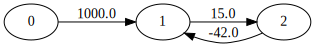

In [73]:
G = nx.read_weighted_edgelist("1.wal", create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G, weighted=True)

se muestra un bucle en los caminos de 1-->2 2-->1 asi mismo la sumatoria de los pesos 15.0 + (-42) < 0. 

entonces en este bucle en algun momento de un recorrido infinito la sumatoria es -infinito


In [85]:
if BellmanFord(G, 0) == False:
  print('SI')
else:
  print('NO')

SI


**Caso de prueba 02** 

In [86]:
%%file 2.wal
0 1 11
1 2 20
2 3 30
3 0 -60


Overwriting 2.wal


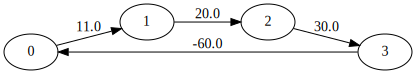

In [88]:
G = nx.read_weighted_edgelist("2.wal", create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G, weighted=True)

Aqui existe un bucle pero en este bucle la sumatoria de los pesos es > 0 ...> nunca llegara a numeros negativos

In [89]:
if BellmanFord(G, 0) == False:
  print('SI')
else:
  print('NO')

NO


**Caso de adicional**

In [90]:
%%file 3.wal
0 1 9
1 2 20
2 3 30
3 0 -60

Writing 3.wal


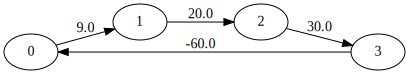

In [92]:
G = nx.read_weighted_edgelist("3.wal", create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G, weighted=True)

En este caso dado que el la sumatoria de pesos del bucle es < 0 ...> se alcanzara numeros negativos confirmando la teoria.

In [93]:
if BellmanFord(G, 0) == False:
  print('SI')
else:
  print('NO')

SI
